In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 모델에 사용할 데이터
- JSON -> Pandas 변환

## products.json

- product_id
- product_name - str
- product_price
- product_inventory - 재고
- category - 0 ~ 7
- discount
- review_star
- product_quanity - 구매수량

In [4]:
# json data load (products.json)
import json

with open('/content/drive/MyDrive/Kakao_Tech_BootCamp/Team Mission/Dummy_data/products.json', 'r') as file:
  products = json.load(file)

print(products)

[{'product_id': 1, 'product_name': '간식_과자_642', 'product_explanation': 'This is a 과자 product in the 간식 category', 'product_image': 'image_1.jpg', 'product_price': 72135, 'product_inventory': 56, 'category': '간식/과자', 'discount': 22, 'create_time': '2022-11-04 16:14:17', 'update_time': '2024-08-08 20:34:58.984801', 'cart_id': None, 'member_id': 5, 'review_star': 4.34, 'product_quanity': 202}, {'product_id': 2, 'product_name': '간식_과자_780', 'product_explanation': 'This is a 과자 product in the 간식 category', 'product_image': 'image_2.jpg', 'product_price': 46861, 'product_inventory': 1, 'category': '간식/과자', 'discount': 44, 'create_time': '2023-06-01 13:59:23', 'update_time': '2024-08-08 20:34:58.984823', 'cart_id': None, 'member_id': 9, 'review_star': 2.94, 'product_quanity': 146}, {'product_id': 3, 'product_name': '간식_과자_663', 'product_explanation': 'This is a 과자 product in the 간식 category', 'product_image': 'image_3.jpg', 'product_price': 11210, 'product_inventory': 0, 'category': '간식/과자', 

In [5]:
import pandas as pd

products_data = products
products_df = pd.DataFrame(products_data)
products_df

,product_id,product_name,product_explanation,product_image,product_price,product_inventory,category,discount,create_time,update_time,cart_id,member_id,review_star,product_quanity
0,1,간식_과자_642,This is a 과자 product in the 간식 category,image_1.jpg,72135,56,간식/과자,22,2022-11-04 16:14:17,2024-08-08 20:34:58.984801,None,5,4.34,202
1,2,간식_과자_780,This is a 과자 product in the 간식 category,image_2.jpg,46861,1,간식/과자,44,2023-06-01 13:59:23,2024-08-08 20:34:58.984823,None,9,2.94,146
2,3,간식_과자_663,This is a 과자 product in the 간식 category,image_3.jpg,11210,0,간식/과자,2,2023-02-06 16:17:04,2024-08-08 20:34:58.984832,None,7,3.12,29
3,4,간식_과자_576,This is a 과자 product in the 간식 category,image_4.jpg,69118,13,간식/과자,31,2023-11-14 06:23:43,2024-08-08 20:34:58.984840,None,6,3.94,115
4,5,간식_과자_993,This is a 과자 product in the 간식 category,image_5.jpg,61117,96,간식/과자,13,2022-08-19 13:35:24,2024-08-08 20:34:58.984848,None,1,2.05,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,정육-가공육_돼지고기_336,This is a 돼지고기 product in the 정육-가공육 category,image_76.jpg,32114,76,정육-가공육/돼지고기,25,2022-09-18 18:35:39,2024-08-08 20:34:58.985409,None,9,3.68,446
76,77,정육-가공육_돼지고기_577,This is a 돼지고기 product in the 정육-가공육 category,image_77.jpg,72560,25,정육-가공육/돼지고기,16,2020-11-14 08:38:07,2024-08-08 20:34:58.985419,None,10,3.46,73
77,78,정육-가공육_돼지고기_242,This is a 돼지고기 product in the 정육-가공육 category,image_78.jpg,22053,45,정육-가공육/돼지고기,29,2023-09-14 16:02:43,2024-08-08 20:34:58.985428,None,8,4.74,240
78,79,정육-가공육_돼지고기_97,This is a 돼지고기 product in the 정육-가공육 category,image_79.jpg,77356,23,정육-가공육/돼지고기,41,2020-06-12 13:12:04,2024-08-08 20:34:58.985435,None,10,2.17,385


#### Data Type 확인

In [7]:
# 데이터 타입 확인
print("#"*10)
print("데이터 타입 확인")
print("Data Types:\n", products_df.dtypes)

# 범주형 및 수치형 데이터 분리하여 분석
product_categorical_cols = products_df.select_dtypes(include=['object', 'category']).columns
product_numerical_cols = products_df.select_dtypes(include=['int64', 'float64']).columns

print("#"*10)
print("범주형 데이터 분리하여 분석")
print("\nCategorical Columns:\n", product_categorical_cols)

print("#"*10)
print("수치형 데이터 분리하여 분석")
print("\nNumerical Columns:\n", product_numerical_cols)

##########
데이터 타입 확인
Data Types:
 product_id               int64
product_name            object
product_explanation     object
product_image           object
product_price            int64
product_inventory        int64
category                object
discount                 int64
create_time             object
update_time             object
cart_id                 object
member_id                int64
review_star            float64
product_quanity          int64
dtype: object
##########
범주형 데이터 분리하여 분석

Categorical Columns:
 Index(['product_name', 'product_explanation', 'product_image', 'category',
       'create_time', 'update_time', 'cart_id'],
      dtype='object')
##########
수치형 데이터 분리하여 분석

Numerical Columns:
 Index(['product_id', 'product_price', 'product_inventory', 'discount',
       'member_id', 'review_star', 'product_quanity'],
      dtype='object')


## 콘텐츠 기반 필터링(Content-Based Filtering)을 사용한 이유
- 콘텐츠 기반 필터링은 사용자와 항목의 특징(특성)을 분석하여 추천하는 방법입니다. 사용자가 과거에 선호했던 항목들의 특성을 바탕으로 유사한 특성을 가진 항목을 추천합니다.

- 개인화된 추천: 사용자의 과거 행동과 선호도를 반영하여 개인화된 추천을 제공할 수 있습니다.
- 새로운 항목 추천: 협업 필터링의 콜드 스타트 문제를 피할 수 있으며, 사용자가 새로 추가된 항목도 추천받을 수 있습니다.
- 직관적 이해: 사용자가 왜 특정 항목을 추천받았는지 쉽게 이해할 수 있습니다. 특정 특성(예: 가격, 카테고리 등)이 추천 이유가 되기 때문입니다.
콘텐츠 기반 필터링을 사용한 이유
- 데이터 가용성: 제공된 데이터셋에는 제품, 구매자, 주문, 리뷰 등의 상세한 특성이 포함되어 있어, 각 항목의 특성을 분석하기에 적합했습니다.
- 특성 기반 분석: 제품의 가격, 재고, 할인율 등과 같은 구체적인 특성을 기반으로 리뷰 평점과의 관계를 분석하여 추천 모델을 만들 수 있습니다.
- 사용자 맞춤 추천: 사용자의 구매 이력과 제품 특성을 기반으로 유사한 제품을 추천할 수 있습니다.

#### 데이터 분포 확인

In [8]:
# 한글 폰트 설치 및 설정
!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 리스트에 추가
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,057 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [9]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

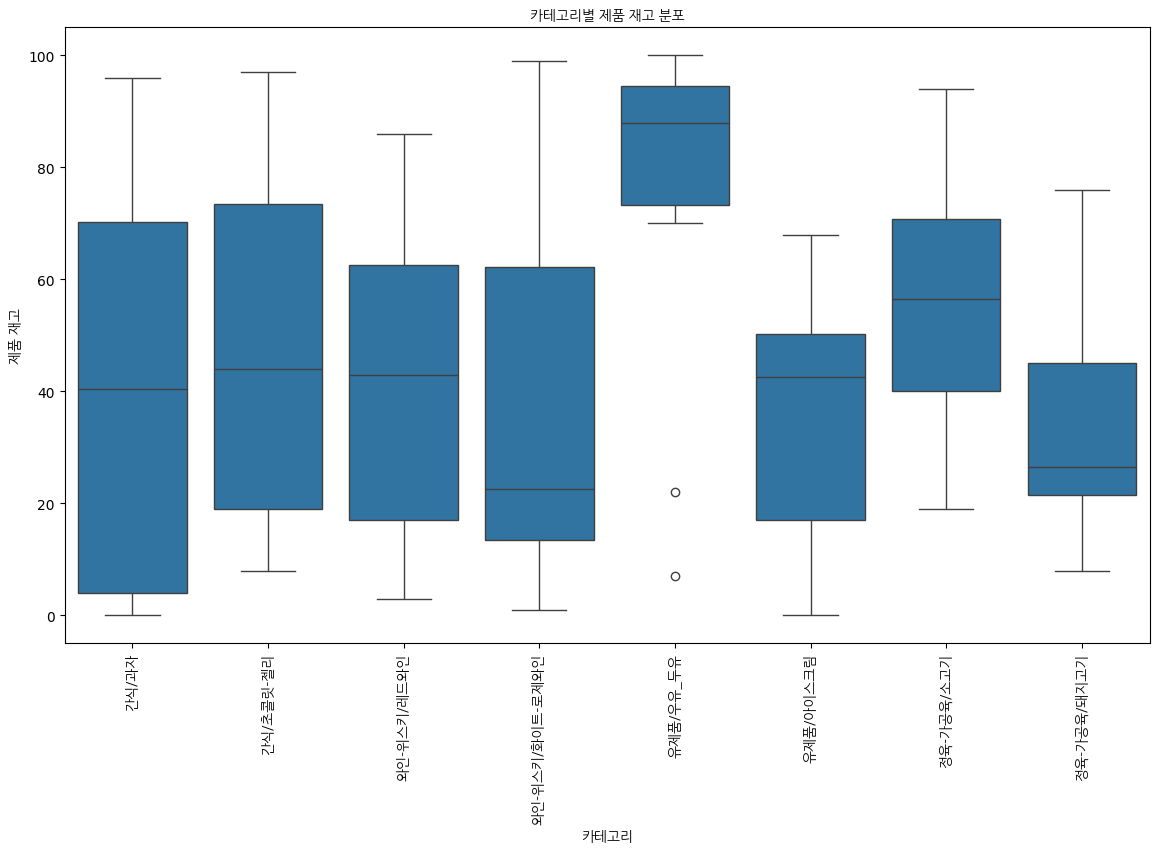

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

# 경고 메시지 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 카테고리별 제품 재고 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='product_inventory', data=products_df)
plt.title('카테고리별 제품 재고 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('제품 재고', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

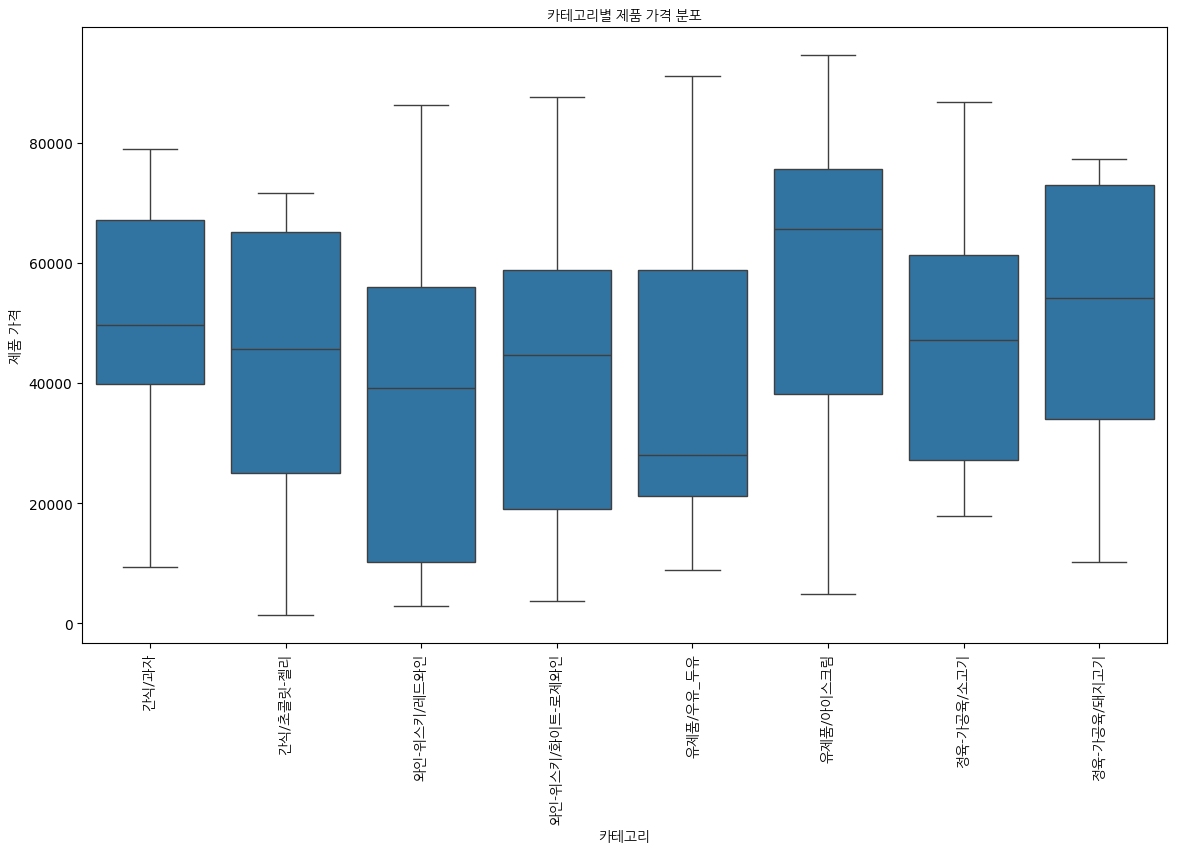

In [11]:
# 카테고리별 제품 가격 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='product_price', data=products_df)
plt.title('카테고리별 제품 가격 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('제품 가격', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

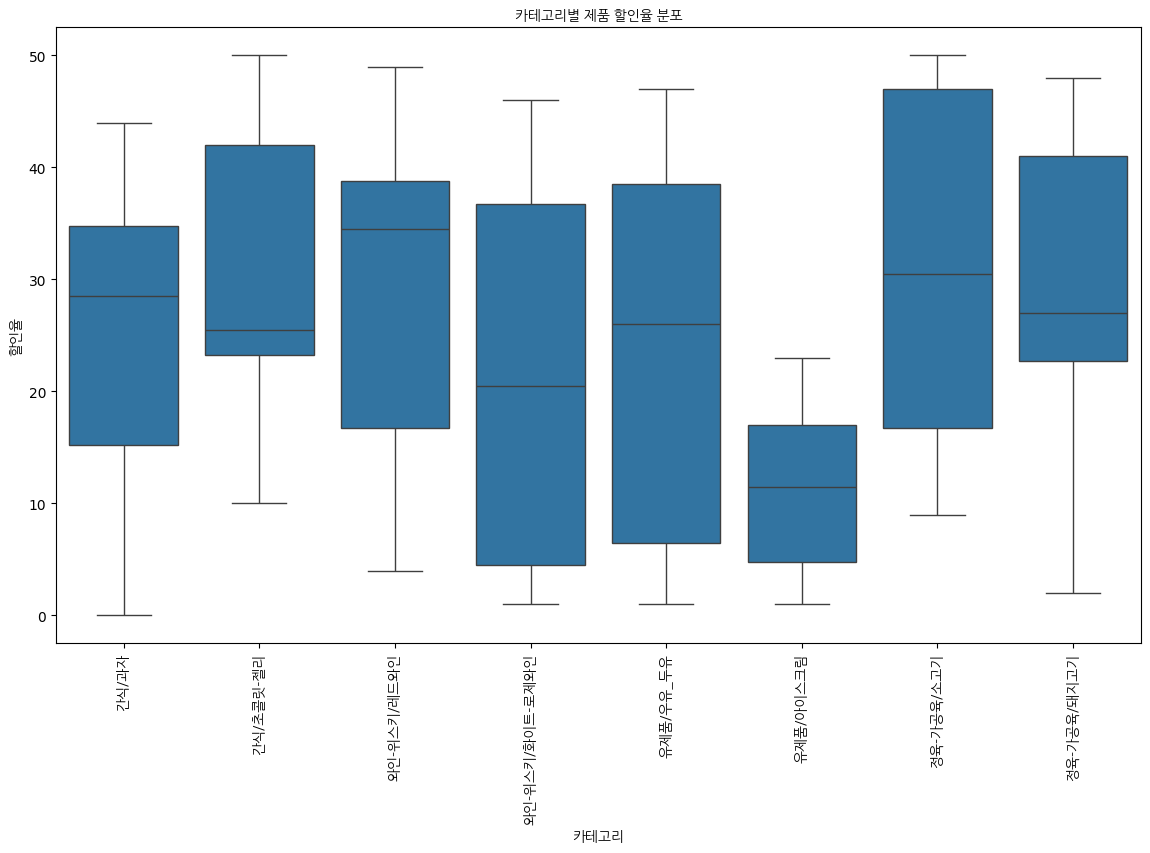

In [12]:
# 카테고리별 제품 할인율 분포
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='discount', data=products_df)
plt.title('카테고리별 제품 할인율 분포', fontproperties=fontprop)
plt.xlabel('카테고리', fontproperties=fontprop)
plt.ylabel('할인율', fontproperties=fontprop)
plt.xticks(rotation=90, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

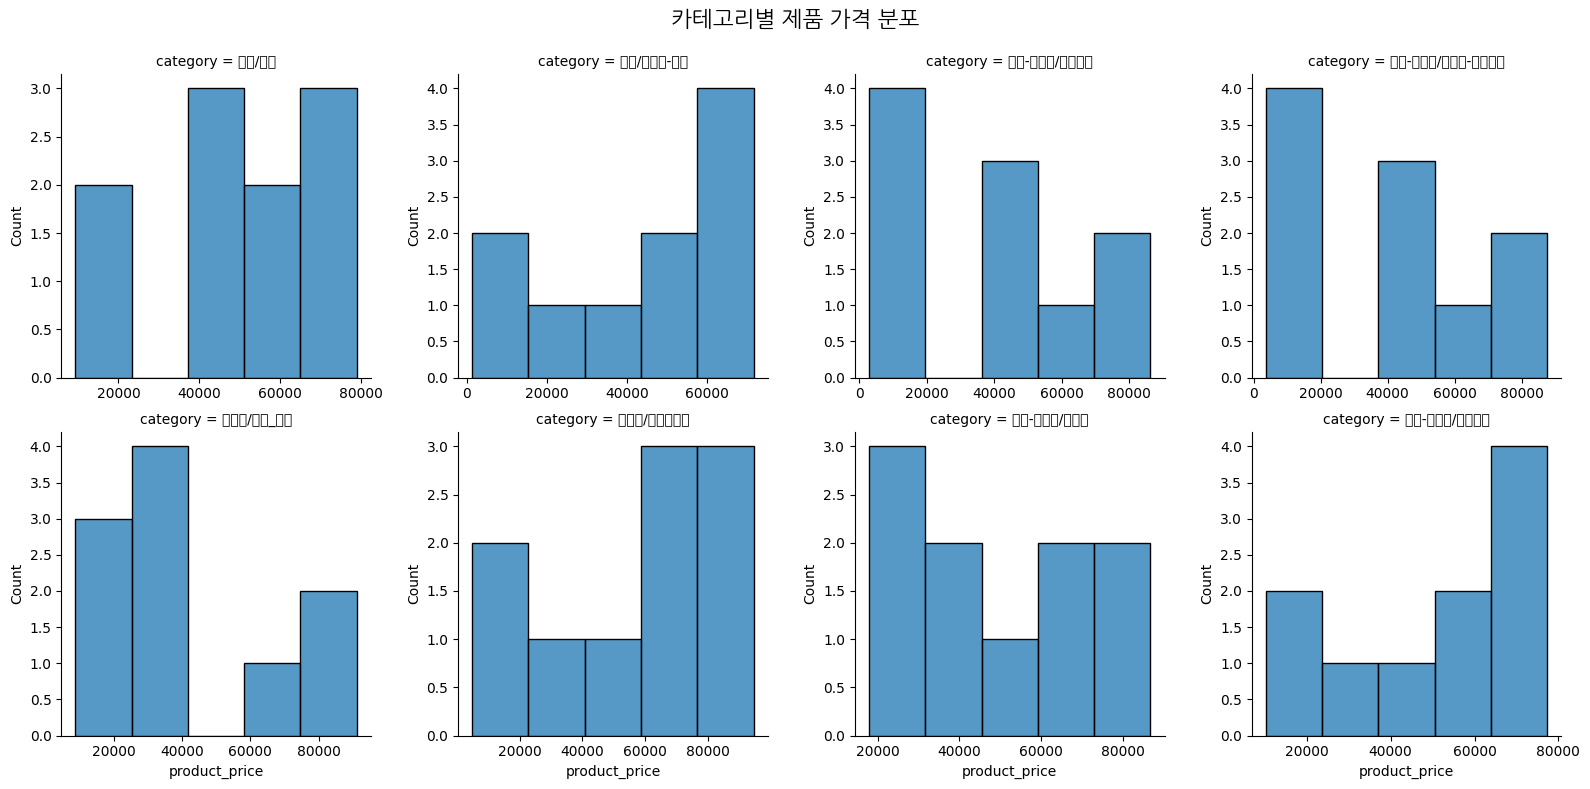

In [13]:
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumGothic')

# 경고 메시지 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 카테고리별 제품 가격 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "product_price")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 가격 분포', fontsize=16, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

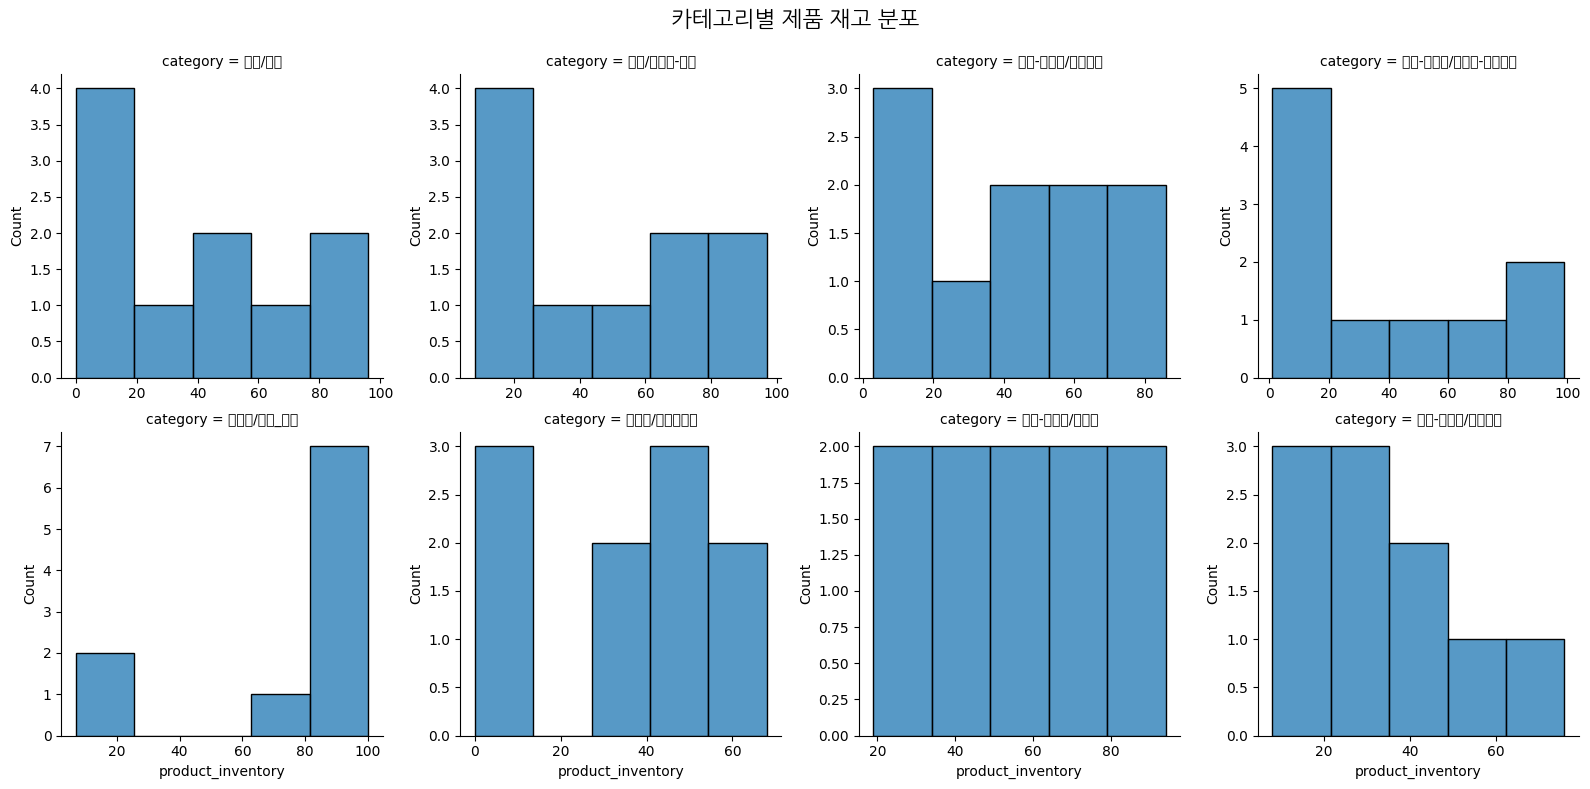

In [14]:
# 카테고리별 제품 재고 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "product_inventory")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 재고 분포', fontsize=16, fontproperties=fontprop)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:12

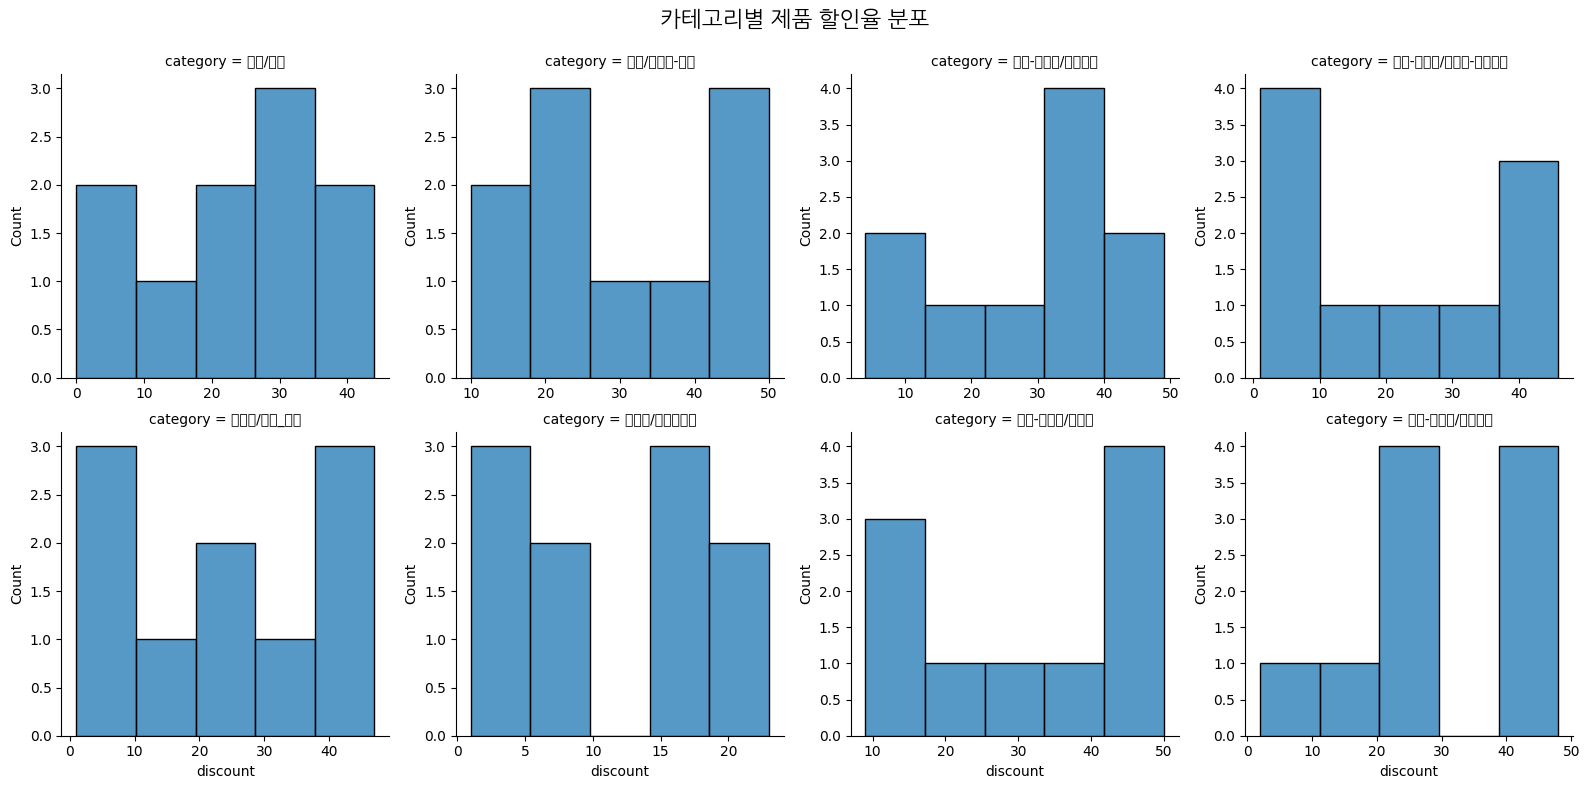

In [15]:
# 카테고리별 제품 할인율 히스토그램
g = sns.FacetGrid(products_df, col="category", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "discount")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('카테고리별 제품 할인율 분포', fontsize=16, fontproperties=fontprop)
plt.show()

## Data 준비

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# 필요한 열만 선택
selected_features = ['product_id', 'product_name', 'product_explanation', 'product_image',
                     'product_price', 'product_inventory', 'category', 'discount',
                     'create_time', 'update_time', 'cart_id', 'member_id',
                     'review_star', 'product_quanity']

products_df = products_df[selected_features]

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
products_df['category'] = label_encoder.fit_transform(products_df['category'])

# 결측값 처리 (리뷰 평점이 없는 행 제거)
products_df = products_df.dropna(subset=['review_star'])

# 사용자-아이템 행렬을 생성합니다.
user_item_matrix = products_df.pivot(index='member_id', columns='product_id', values='review_star').fillna(0)

# 아이템 간 유사도를 계산합니다.
item_similarity = cosine_similarity(user_item_matrix.T)

# 유사도 데이터프레임을 생성합니다.
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

def get_similar_items(product_id, num_items=5):
    if product_id in item_similarity_df.index:
        similar_items = item_similarity_df[product_id].sort_values(ascending=False).head(num_items)
        return similar_items
    else:
        return f"Product ID {product_id} not found in the dataset"

In [18]:
# 데이터셋에 있는 product_id들을 출력합니다.
available_product_ids = item_similarity_df.index.tolist()
print("Available Product IDs:", available_product_ids)

# 특정 제품과 유사한 제품 추천
product_id_to_check = available_product_ids[0]  # 유효한 제품 ID 중 하나 선택
print(f"Similar items to product ID {product_id_to_check}:")
print(get_similar_items(product_id_to_check, 5))

Available Product IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Similar items to product ID 1:
product_id
1     1.0
75    1.0
65    1.0
66    1.0
52    1.0
Name: 1, dtype: float64


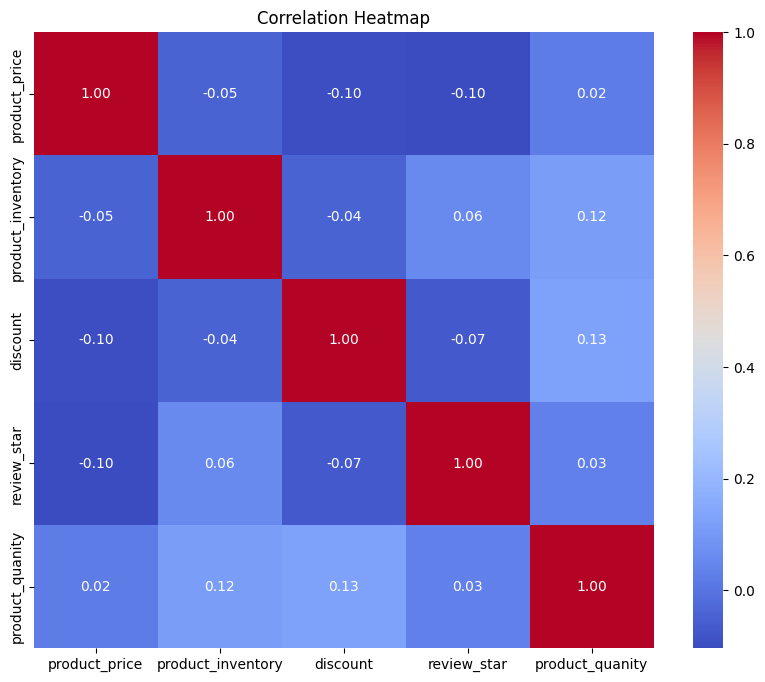

In [22]:
# 상관계수 행렬 계산
# 관심있는 수치형 변수들 간의 상관관계를 계산
# 필요한 열만 선택
selected_features = ['product_price', 'product_inventory', 'discount', 'review_star', 'product_quanity']

# 결측값 처리
products_df = products_df.dropna(subset=selected_features)

corr_matrix = products_df[selected_features].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Feature Importance

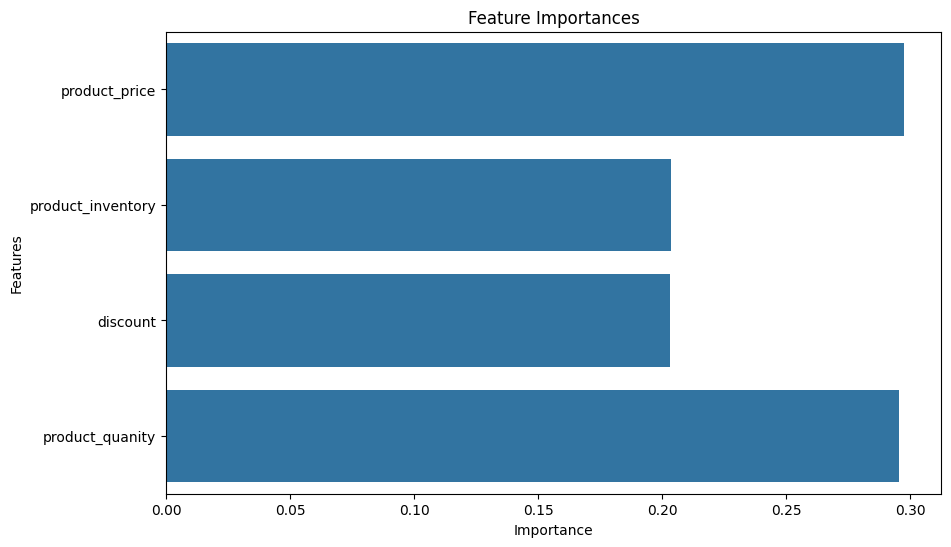

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 관심 있는 피처와 타겟 변수 설정
features = ['product_price', 'product_inventory', 'discount', 'product_quanity']
target = 'review_star'

# 결측치 처리
products_df = products_df.dropna(subset=[target])
X = products_df[features].fillna(0)
y = products_df[target]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (랜덤 포레스트는 스케일링이 필요하지 않지만, 일반적인 접근 방법)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_
features_names = X.columns

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Product Price (상품 가격):
- 가장 높은 중요도를 보입니다. 이는 product_price가 review_star 예측에 가장 큰 영향을 미친다는 것을 의미합니다. 즉, 상품 가격이 리뷰 평점에 매우 중요한 역할을 한다고 볼 수 있습니다.

#### Product Inventory (상품 재고):
- 중간 정도의 중요도를 보입니다. 이는 product_inventory가 리뷰 평점에 어느 정도 영향을 미친다는 것을 의미합니다. 재고 수량이 많거나 적은 것이 사용자의 리뷰 평점에 영향을 줄 수 있습니다.

#### Discount (할인율):
- 중간 정도의 중요도를 보입니다. 이는 discount가 리뷰 평점에 영향을 미친다는 것을 의미합니다. 할인이 있는 경우 리뷰 평점에 긍정적이거나 부정적인 영향을 줄 수 있습니다.

#### Product Quanity (구매 수량):
- 중간 정도의 중요도를 보입니다.. 이는 quantity가 리뷰 평점에 상대적으로 적은 영향을 미친다는 것을 의미합니다. 구매 수량은 리뷰 평점에 덜 중요한 요소일 수 있습니다.

In [25]:
from sklearn.preprocessing import LabelEncoder

# products_df 데이터프레임이 이미 로드된 상태로 가정합니다

# 필요한 열 선택
selected_features = ['product_id', 'review_star', 'product_price', 'product_inventory', 'category', 'discount', 'product_quanity']

# 범주형 변수 인코딩
label_encoder = LabelEncoder()
products_df['category'] = label_encoder.fit_transform(products_df['category'])

# 필요한 열 선택
filtered_data = products_df[selected_features]

# 결측값 확인
print("결측값 개수:\n", filtered_data.isnull().sum())

# 데이터 확인
print("Filtered Data:\n", filtered_data.head())
print("Filtered Data Shape:", filtered_data.shape)


결측값 개수:
 product_id           0
review_star          0
product_price        0
product_inventory    0
category             0
discount             0
product_quanity      0
dtype: int64
Filtered Data:
    product_id  review_star  product_price  product_inventory  category  \
0           1         4.34          72135                 56         0   
1           2         2.94          46861                  1         0   
2           3         3.12          11210                  0         0   
3           4         3.94          69118                 13         0   
4           5         2.05          61117                 96         0   

   discount  product_quanity  
0        22              202  
1        44              146  
2         2               29  
3        31              115  
4        13              374  
Filtered Data Shape: (80, 7)


In [26]:
# Filter data
filtered_data = products_df[selected_features]

# Save to CSV
file_path = '/content/merged_data.csv'
filtered_data.to_csv(file_path, index=False)

file_path

'/content/merged_data.csv'